In [1]:
import os
#os.environ['PROJ_LIB'] = r'C:\Users\regin\Anaconda3\pkgs\proj4-5.2.0-ha925a31_1\Library\share'
os.environ['PROJ_LIB'] = r'C:\Users\Work\Anaconda3\pkgs\proj4-5.2.0-ha925a31_1\Library\share'
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl

In [2]:
#my_nc_file = '/Users/regin/Desktop/R/S2Scalibrationextremeheat/loadeR/2t_201902_Mar_format.nc'
my_nc_file = '/Users/Work/Documents/Github/S2Scalibrationextremeheat/loadeR/2t_201902_Mar_format.nc'
data = Dataset(my_nc_file, mode='r')

#obs_file = '/Users/Work/Desktop/Regine_project/data/2t_era5_Mar_1993_2016_format.nc'
obs_file = '/Users/Work/Documents/Github/S2Scalibrationextremeheat/loadeR/2t_era5_Mar_1993_2016_format.nc'
obs_data = Dataset(obs_file, mode='r')

In [3]:
#put each of the variables 1) lons, 2) lats, 3) tass (temperature) into numpy arrays.
lons = data.variables['lon'][:]
lats = data.variables['lat'][:]
tass = data.variables['tas'][:]
data.close()

tass_era5 = obs_data.variables['tas'][:]
obs_data.close()

#compute mean of the given data (array elements) along a specified axis.
ens_mean = np.mean(tass, axis=(0,1))-273.15 #convert to degC
obs_mean = np.mean(tass_era5, axis=0)-273.15 #convert to degC

#print out dimension of lat and lon
print(ens_mean.shape)
print(np.max(ens_mean))
print(np.min(ens_mean))
print(np.max(obs_mean))
print(np.min(obs_mean))

(31, 51)
29.771088
12.752289
30.53299
12.424469


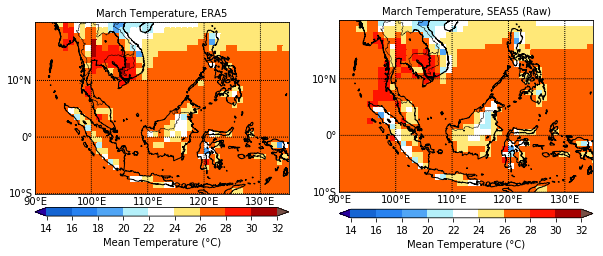

In [4]:
# Get some parameters for the Mercator Projection
lon_0 = lons.mean()
lat_0 = lats.mean()

fig = plt.figure(figsize=(10,10))

#first plot
ax = fig.add_subplot(1,2,1)

m = Basemap(llcrnrlon=90, llcrnrlat=-10, 
            urcrnrlon=135,urcrnrlat=20,
            projection='merc', resolution = 'i',
            lon_0=lon_0, lat_0=lat_0)

# Because our lon and lat variables are 1D, use meshgrid to create 2D arrays
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

# Set the color scale
cmap = mpl.colors.ListedColormap(["#1464d2","#2882f0","#50a5f5","#b4f0fa","#ffffff","#ffe878","#ff6000","#ff1400", "#a50000"])
label = "Mean Temperature (°C)"
bounds = [14, 16, 18, 20, 22, 24, 26, 28, 30, 32]
cmap.set_under(color = "#2800a0")
cmap.set_over(color = "#785046")
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# Plot Data
cs = m.pcolormesh(xi,yi,np.squeeze(obs_mean),cmap=cmap,norm= norm)

# Add Grid Lines
m.drawparallels(np.arange(-10., 30., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(90., 150., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="8%", extend = 'both')
cbar.set_label(label,fontsize=10)
cbar.ax.tick_params(labelsize=10)

# Add Title
plt.title('March Temperature, ERA5',fontsize=10)

# Second plot
ax = fig.add_subplot(1,2,2)

m = Basemap(llcrnrlon=90, llcrnrlat=-10, 
            urcrnrlon=135,urcrnrlat=20,
            projection='merc', resolution = 'i',
            lon_0=lon_0, lat_0=lat_0)

# Because our lon and lat variables are 1D, use meshgrid to create 2D arrays
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

# Set the color scale
cmap = mpl.colors.ListedColormap(["#1464d2","#2882f0","#50a5f5","#b4f0fa","#ffffff","#ffe878","#ff6000","#ff1400", "#a50000"])
label = "Mean Temperature (°C)"
bounds = [14, 16, 18, 20, 22, 24, 26, 28, 30, 32]
cmap.set_under(color = "#2800a0")
cmap.set_over(color = "#785046")
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# Plot Data
cs = m.pcolormesh(xi,yi,np.squeeze(ens_mean),cmap=cmap,norm= norm)

# Add Grid Lines
m.drawparallels(np.arange(-10., 30., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(90., 150., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%", extend = 'both')
cbar.set_label(label,fontsize=10)
cbar.ax.tick_params(labelsize=10)

# Add Title
plt.title('March Temperature, SEAS5 (Raw)',fontsize=10)

#plt.tight_layout()
plt.show()